In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm
import time
import re

0.0044 seconds to run with 10 samples


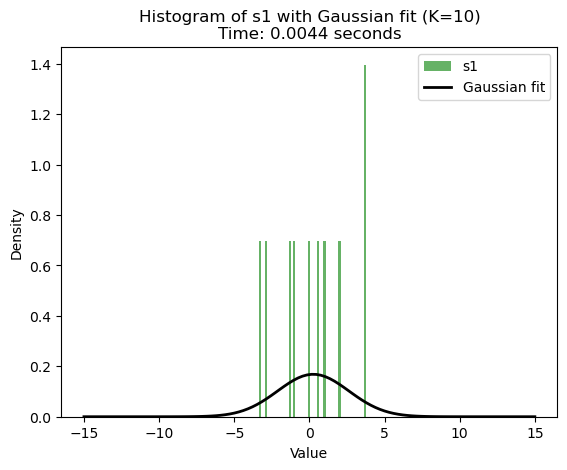

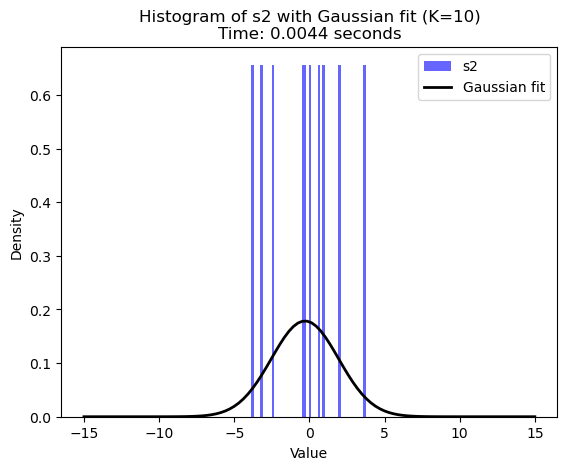

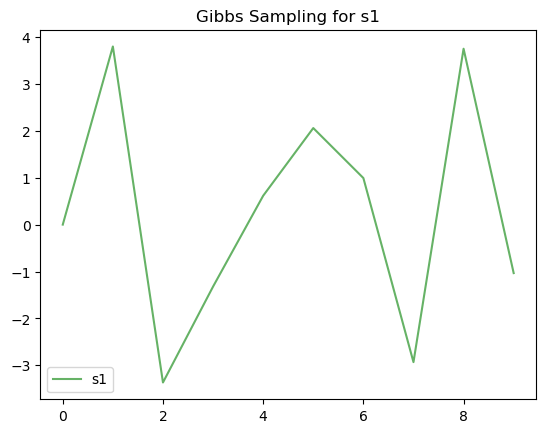

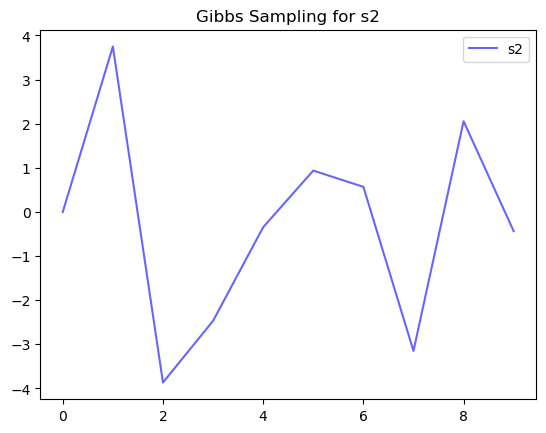

0.0167 seconds to run with 100 samples


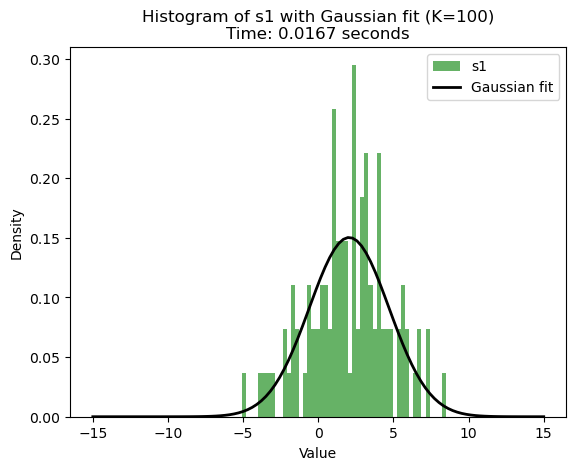

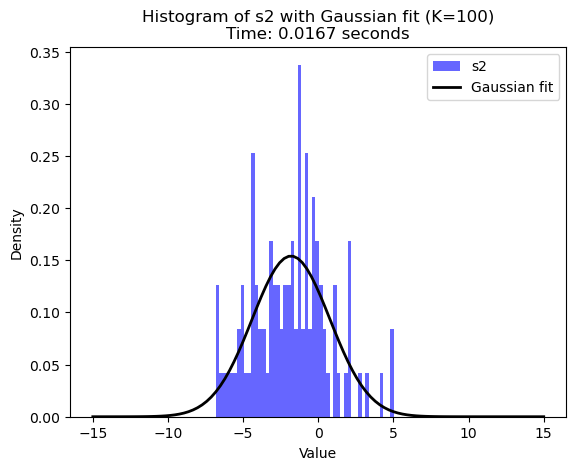

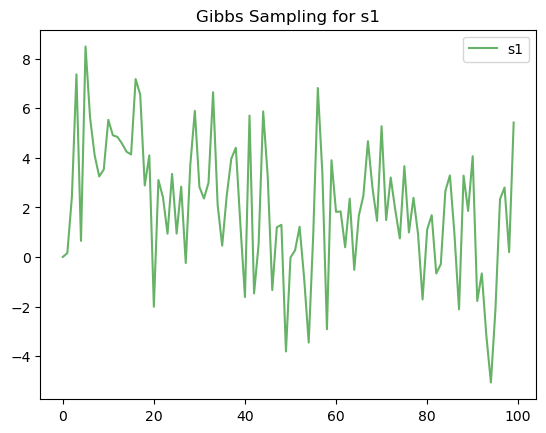

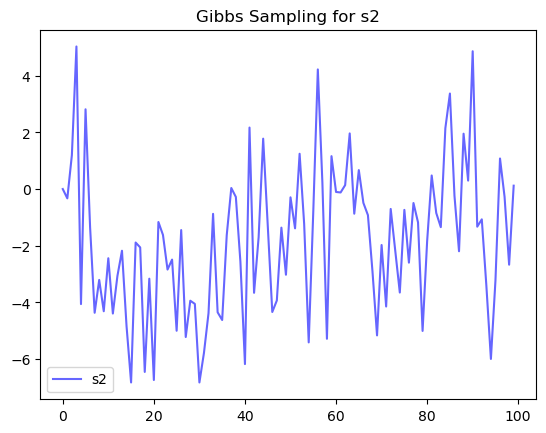

0.1456 seconds to run with 1000 samples


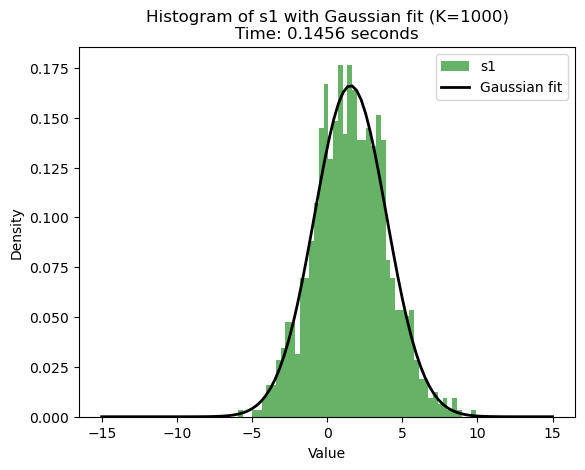

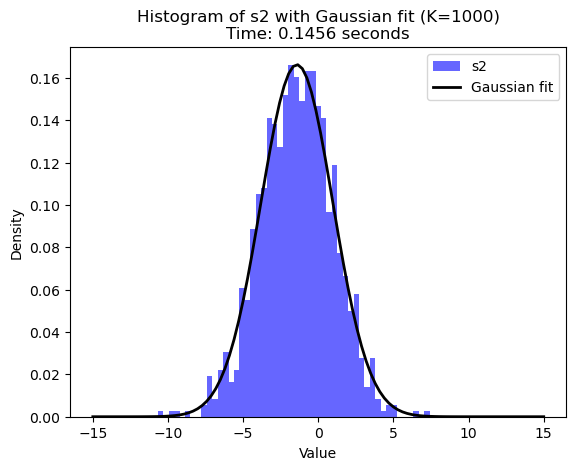

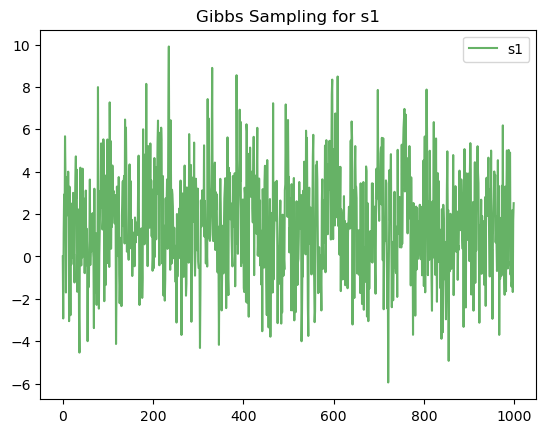

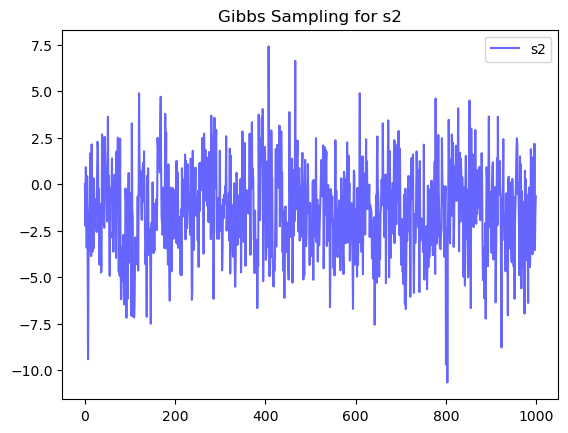

1.2268 seconds to run with 10000 samples


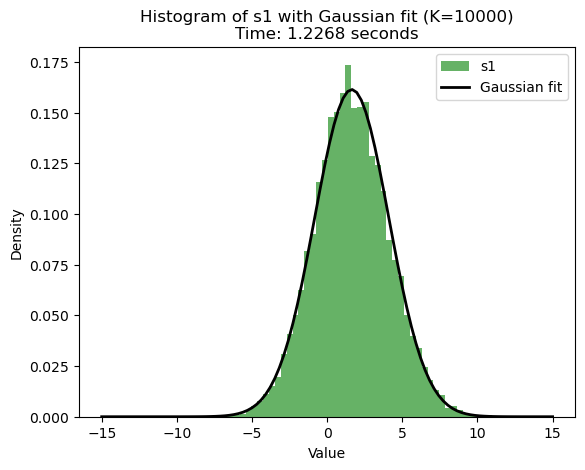

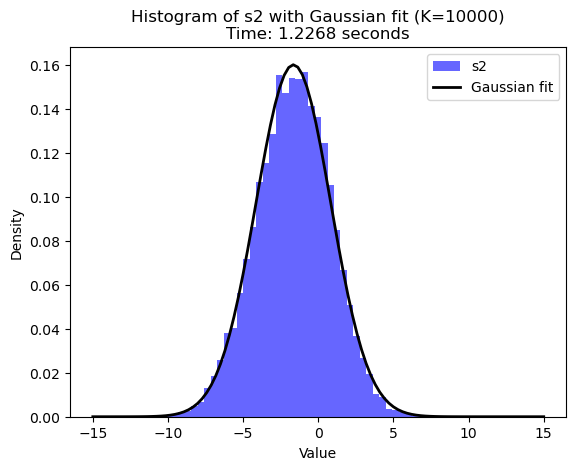

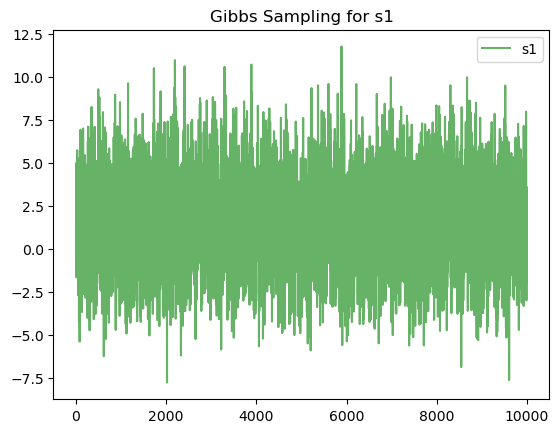

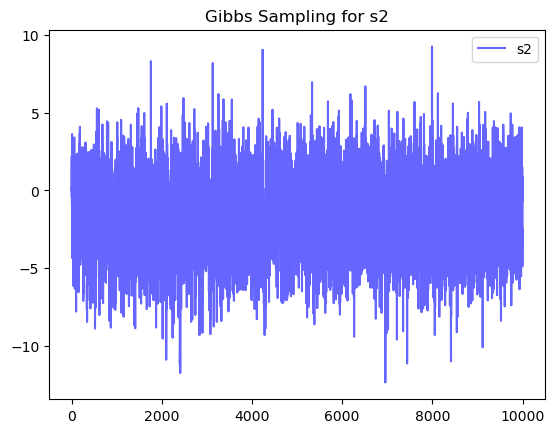

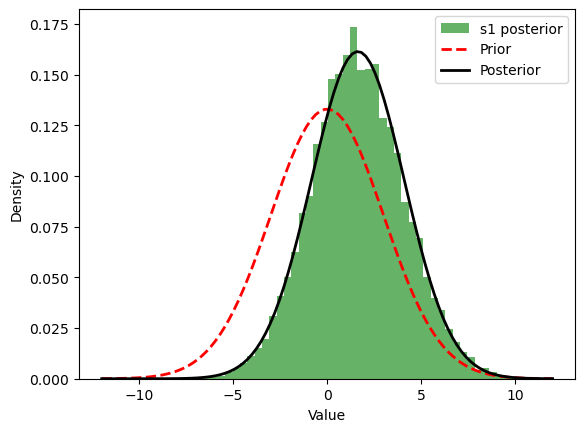

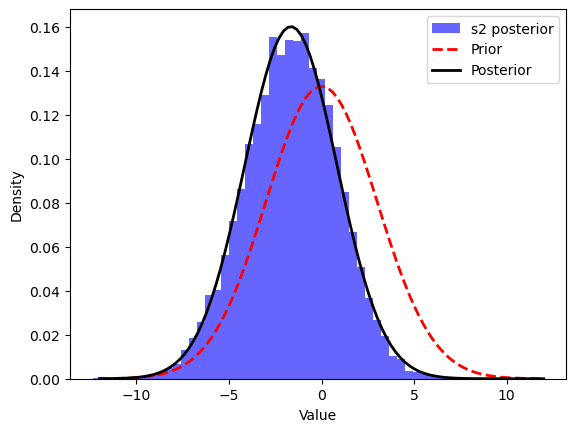

In [29]:
"""
Task 4

"""

def gibbs_sampling_T4(mu1, sigma1, mu2, sigma2, sigma3, K):

    M = np.array([[1, -1]])

    mu = np.array([[mu1], [mu2]])  
    sigmaA = np.array([[sigma1**2, 0], [0, sigma2**2]])
    sigmaAB = np.linalg.inv(np.linalg.inv(sigmaA) + (1 / sigma3**2) * np.transpose(M) @ M)

    myclip_a = 0
    myclip_b = 1000
    my_std = sigma3

    # Gibbs sampling
    s1 = np.zeros(K)
    s2 = np.zeros(K)
    t = np.zeros(K)
    s1[0] = mu1
    s2[0] = mu2

    for k in range(K-1):
        muAB = sigmaAB @ (np.linalg.inv(sigmaA) @ mu + (1 / sigma3**2) * np.transpose(M) @ np.array([[t[k]]]))
        muAB2 = np.ravel(muAB)  # Flatten the array to 1D
        s1[k+1], s2[k+1] = np.random.multivariate_normal(muAB2, sigmaAB)
        my_mean = s1[k+1] - s2[k+1]
        a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
        t[k+1] = truncnorm.rvs(a, b, loc=my_mean, scale=my_std)

    # Calculate parameters
    mu_s1 = np.mean(s1)
    std_s1 = np.std(s1)
    mu_s2 = np.mean(s2)
    std_s2 = np.std(s2)

    return s1, s2, mu_s1, std_s1, mu_s2, std_s2

def plot_histogram_and_fit(s1, s2, mu1, sigma1, mu2, sigma2, K, time_elapsed):
    # Parameters for plotting
    x_s1 = np.linspace(mu1 - 5 * sigma1, mu1 + 5 * sigma1, 100)
    x_s2 = np.linspace(mu2 - 5 * sigma2, mu2 + 5 * sigma2, 100)

    mu_s1 = np.mean(s1)
    std_s1 = np.std(s1)
    S1 = norm.pdf(x_s1, mu_s1, std_s1)

    mu_s2 = np.mean(s2)
    std_s2 = np.std(s2)
    S2 = norm.pdf(x_s2, mu_s2, std_s2)

    # Plot s1 histogram and Gaussian fit
    plt.hist(s1, bins=50, density=True, alpha=0.6, color='g', label="s1")
    plt.plot(x_s1, S1, 'k', linewidth=2, label="Gaussian fit")
    plt.title(f"Histogram of s1 with Gaussian fit (K={K})\nTime: {time_elapsed:.4f} seconds")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # Plot s2 histogram and Gaussian fit
    plt.hist(s2, bins=50, density=True, alpha=0.6, color='b', label="s2")
    plt.plot(x_s2, S2, 'k', linewidth=2, label="Gaussian fit")
    plt.title(f"Histogram of s2 with Gaussian fit (K={K})\nTime: {time_elapsed:.4f} seconds")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


    # Gibbs sampling plot of (s1, s2)
    plt.plot(s1,label="s1",color='g',alpha=0.6)
    plt.title(f"Gibbs Sampling for s1")
    plt.legend()
    plt.show()

    plt.plot(s2,label="s2", color='b',alpha=0.6)
    plt.title(f"Gibbs Sampling for s2")
    plt.legend()
    plt.show()





# Initial parameters
sigma1, sigma2, sigma3 = 3, 3, 1
mu1, mu2 = 0, 0

# Values of K to test
Ks = [10, 100, 1000, 10000]

for K in Ks:
    time_start = time.perf_counter()
    s1, s2, _, _, _, _   = gibbs_sampling_T4(mu1, sigma1, mu2, sigma2, sigma3, K)
    time_elapsed = time.perf_counter() - time_start
    print(f"{time_elapsed:.4f} seconds to run with {K} samples")
    plot_histogram_and_fit(s1, s2, mu1, sigma1, mu2, sigma2, K, time_elapsed)




# Plotting posteriors and priors
def plot_posterior_vs_prior(s, prior_mu, prior_sigma, label, color):
    # Posterior parameters
    mu_post = np.mean(s)
    sigma_post = np.std(s)

    # Prior distribution
    x = np.linspace(prior_mu - 4 * prior_sigma, prior_mu + 4 * prior_sigma, 100)
    prior = norm.pdf(x, prior_mu, prior_sigma)

    # Posterior distribution
    posterior = norm.pdf(x, mu_post, sigma_post)

    # Plot
    plt.hist(s, bins=50, density=True, alpha=0.6, color=color, label=f"{label} posterior")
    plt.plot(x, prior, 'r--', linewidth=2, label="Prior")
    plt.plot(x, posterior, 'k-', linewidth=2, label="Posterior")
    # plt.title(f"Posterior vs Prior of {label} (K={K})")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    

# Plot posterior vs prior for s1 and s2

plot_posterior_vs_prior(s1, mu1, sigma1, "s1", 'g')
plot_posterior_vs_prior(s2, mu2, sigma2, "s2", 'b')




In [16]:
"""
Task 5

"""


def gibbs_sampling_T5(mu1, sigma1, mu2, sigma2, sigma3):
    """
    Wrapper function for gibbs_sampling to use a fixed number of samples (5000).

    Parameters:
    mu1, sigma1, mu2, sigma2, sigma3: Means and standard deviations of the prior distributions.

    Returns:
    mu_s1, std_s1, mu_s2, std_s2: Means and standard deviations of the sampled values.
    """
    K = 1000
    s1, s2, mu_s1, std_s1, mu_s2, std_s2 = gibbs_sampling_T4(mu1, sigma1, mu2, sigma2, sigma3, K)
    return (mu_s1, std_s1, mu_s2, std_s2)



def update_team_skills_T5(data):
    """
    Update team skills based on match outcomes.

    Parameters:
    data: DataFrame containing match data.

    Returns:
    team_list: Dictionary with updated team skills.
    df: DataFrame with sorted team skills and ranks.
    """
    teams = data['team1'].drop_duplicates()
    team_list = {team: (0, 5) for team in teams}

    for i in range(data.shape[0]):
        score_diff = data.iloc[i]['score1'] - data.iloc[i]['score2']
        if score_diff != 0:
            winner = data.iloc[i]['team1'] if score_diff > 0 else data.iloc[i]['team2']
            loser = data.iloc[i]['team2'] if score_diff > 0 else data.iloc[i]['team1']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T5(
                team_list[winner][0], team_list[winner][1],
                team_list[loser][0], team_list[loser][1], sigma3
            )
            team_list[winner] = (mu1, sigma1)
            team_list[loser] = (mu2, sigma2)

    df = pd.DataFrame.from_dict(team_list, orient='index', columns=['Skill', 'Standard Deviation'])
    df.sort_values(by='Skill', ascending=False, inplace=True)
    df['Rank'] = range(1, len(df) + 1)

    return team_list, df

# Load data
data_unshuffled = pd.read_csv("SerieA.csv")  # Unshuffled data
data_shuffled = pd.read_csv("SerieA.csv").sample(frac=1).reset_index(drop=True)  # Shuffled data

#  Number of ranking samples
N = 1
df_unshuffled_list = []
df_shuffled_list = []
for i in range(N):
    team_list_unshuffled, df_unshuffled = update_team_skills_T5(data_unshuffled)
    team_list_shuffled, df_shuffled = update_team_skills_T5(data_shuffled)
    df_unshuffled_list.append(df_unshuffled)
    df_shuffled_list.append(df_shuffled)
    print("\nUnshuffled Data Team List time",i+1,": \n", df_unshuffled)
    print("Shuffled Data Team List time ",i+1,":\n", df_shuffled)
    



Unshuffled Data Team List time 1 : 
                Skill  Standard Deviation  Rank
Atalanta    1.265022            0.416829     1
Napoli      1.071014            0.493623     2
Milan       0.956607            0.484937     3
Torino      0.895339            0.463715     4
Roma        0.844725            0.430910     5
Inter       0.838925            0.394349     6
Bologna     0.314269            0.426970     7
Lazio       0.310723            0.345691     8
Juventus    0.252549            0.544076     9
Sampdoria   0.020780            0.351695    10
Udinese    -0.003993            0.367642    11
Empoli     -0.006884            0.386619    12
Spal       -0.024012            0.406451    13
Genoa      -0.350569            0.463819    14
Cagliari   -0.367839            0.368709    15
Parma      -0.623142            0.411385    16
Fiorentina -0.818028            0.381550    17
Sassuolo   -0.918095            0.507438    18
Frosinone  -0.957999            0.424858    19
Chievo     -1.610928  

In [41]:
"""

Task 6

"""

def ADF_predict_T6(mu1, sigma1, mu2, sigma2):
    L = 1000  # number of samples
    sigma3 = 3

    # Generate L samples from normal distributions for both teams
    s1 = np.random.normal(mu1, sigma1, L)
    s2 = np.random.normal(mu2, sigma2, L)
    
    # Calculate the mean difference between samples
    mean_diff = s1 - s2  
    
    t = np.random.normal(loc=mean_diff, scale=sigma3, size=L)  
    
    # Take the mean of the samples
    mean_t = np.mean(t)
    
    # Determine the sign of the mean (1 if positive, -1 if negative)
    y = np.sign(mean_t)
    
    return y

def initialize_team_list_T6(data):
    # Get unique team names
    teams = data['team1'].drop_duplicates()
    
    # Initialize team ratings with a mean of 0 and standard deviation of 5
    team_list = {team: (0, 5) for team in teams}
    
    return team_list

def update_team_ratings_T6(data, team_list):
    """
    Returns a list of the mean and variance of each team's skill after the 2018/2019 season.
    """
    ADF_predicted_list = []
    # Iterate over each match in the dataset
    for i in range(data.shape[0]):
        score = data.iloc[i]['score1'] - data.iloc[i]['score2']
        
        # Predict the match result based on current team ratings
        y = ADF_predict_T6(team_list[data.iloc[i]['team1']][0], team_list[data.iloc[i]['team1']][1],
                team_list[data.iloc[i]['team2']][0], team_list[data.iloc[i]['team2']][1])
        
        ADF_predicted_list.append(y)
        
        # Update team ratings based on match result
        if score > 0:
            winner = data.iloc[i]['team1']
            loser = data.iloc[i]['team2']
        elif score < 0:
            winner = data.iloc[i]['team2']
            loser = data.iloc[i]['team1']
        else:
            continue  # Skip draws for rating updates

        mu1, sigma1, mu2, sigma2 = gibbs_sampling_T5(team_list[winner][0], team_list[winner][1],
                                                     team_list[loser][0], team_list[loser][1],sigma3 = 3)
        
        # Update the ratings for both the winner and loser
        team_list[winner] = [mu1, sigma1]
        team_list[loser] = [mu2, sigma2]
    
    return team_list, ADF_predicted_list

def true_results_T6(data):
    """
    Return the list of the true results
    """
    true_result = list()
    draw = 0
    # Calculate the actual match results
    score = data['score1'] - data['score2']
    for i in range(data.shape[0]):
        if score[i] > 0:
            true_result.append(1)
        elif score[i] < 0:
            true_result.append(-1)
        else:
            true_result.append(0)
            draw += 1
    return true_result


def compare_result_T6(prediction, data):
    """
    Print number of correct predictions and prediction rate using ADF
    """
    true_result = true_results_T6(data)
    count = 0
   
    # Convert lists to numpy arrays for element-wise comparison
    true_result = np.array(true_result)
    prediction = np.array(prediction)
    # Compare predictions with actual results
    count_list = (true_result == prediction)
    count = np.sum(count_list)

    total_matches = data.shape[0]
    pred_rate = count / total_matches
    
    # Print the results
    # print("Predict Result:", count_list)
    # print("Number of correct predictions:", count)
    # print("Prediction rate:", pred_rate)
    first_half = count_list[:total_matches//2]
    second_half = count_list[total_matches//2:]
    first_half_rate =  sum(first_half)/len(first_half)
    second_half_rate = sum(second_half)/len(second_half)
    # print("Prediction rate of the first half season:",first_half_rate)
    # print("Prediction rate of the second half season:", second_half_rate)
    return pred_rate, first_half_rate, second_half_rate, count_list

def compare_naive_guess_result_T6(data):
    """
    Print number of correct predictions and prediction rate using naive guess
    """
    true_result = true_results_T6(data)
    true_result = np.array(true_result)
    # Naive guess with P(team 1 win) = P(team 2 win) = 1/2
    naive_guess = np.where(np.random.rand(true_result.size) < 0.5, -1, 1)
    count = np.sum(true_result == naive_guess)
    total_matches = data.shape[0]
    pred_rate = count / total_matches
    # print("Number of correct predictions using naive guess:", count)
    # print("Prediction rate using naive guess:", pred_rate)
    naive_rate = pred_rate
    return naive_rate

    


data = pd.read_csv("SerieA.csv") 



# Compare the prediction results with actual data
N = 100
R = np.zeros(N)
R_first_half = np.zeros(N)
R_second_half = np.zeros(N)
R_naive = np.zeros(N)
for i in range(100):
    # Initialize the team list
    team_list = initialize_team_list_T6(data)
    # Update team ratings based on match data and generate predictions
    team_list, ADF_predicted_list = update_team_ratings_T6(data, team_list)
    pred_rate, first_half_rate, second_half_rate, predict_list = compare_result_T6(ADF_predicted_list, data)
    naive_rate = compare_naive_guess_result_T6(data)
    R[i] = pred_rate
    R_first_half[i] = first_half_rate
    R_second_half[i] = second_half_rate
    R_naive[i] = naive_rate
    print(f"Predictation rate R at time {i+1}: {pred_rate}")
    print(f"Predictation rate of the first half season at time {i+1}: {first_half_rate}")
    print(f"Predictation rate of the second half season at time {i+1}: {second_half_rate}")
    print(f"Predictation rate R_naive at time {i+1}: {naive_rate}")


print("Mean of R:", np.mean(R))
print("Range of R_new with the first improvement:", (np.min(R), np.max(R)))

print("Mean of R first half:", np.mean(R_first_half))
print("Range of R first half:", (np.min(R_first_half), np.max(R_first_half)))

print("Mean of R second half:", np.mean(R_second_half))
print("Range of R second half:", (np.min(R_second_half), np.max(R_second_half)))

print("Mean of R_naive:", np.mean(R_naive))
print("Range of R_naive:", (np.min(R_naive), np.max(R_naive)))



Predictation rate R at time 1: 0.46842105263157896
Predictation rate of the first half season at time 1: 0.4421052631578947
Predictation rate of the second half season at time 1: 0.49473684210526314
Predictation rate R_naive at time 1: 0.3894736842105263
Predictation rate R at time 2: 0.46578947368421053
Predictation rate of the first half season at time 2: 0.4368421052631579
Predictation rate of the second half season at time 2: 0.49473684210526314
Predictation rate R_naive at time 2: 0.3473684210526316
Predictation rate R at time 3: 0.4631578947368421
Predictation rate of the first half season at time 3: 0.43157894736842106
Predictation rate of the second half season at time 3: 0.49473684210526314
Predictation rate R_naive at time 3: 0.37894736842105264
Predictation rate R at time 4: 0.46842105263157896
Predictation rate of the first half season at time 4: 0.4263157894736842
Predictation rate of the second half season at time 4: 0.5105263157894737
Predictation rate R_naive at time 4:

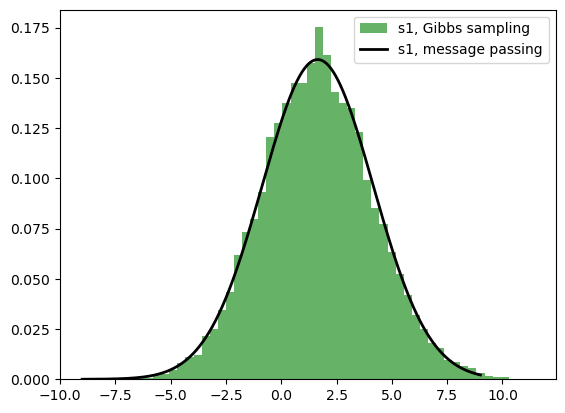

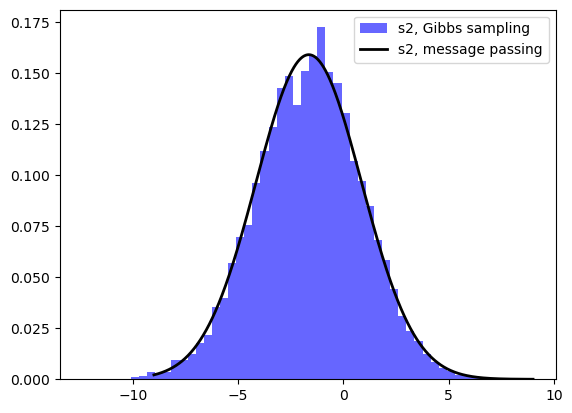

In [21]:
"""

Task 7

"""


def multiplyGauss_T7(m1, s1, m2, s2):
    """
    Multiplies two Gaussian distributions.

    Parameters:
    m1 (float): Mean of the first Gaussian distribution.
    s1 (float): Variance of the first Gaussian distribution.
    m2 (float): Mean of the second Gaussian distribution.
    s2 (float): Variance of the second Gaussian distribution.

    Returns:
    m (float): Mean of the resulting Gaussian distribution after multiplication.
    s (float): Variance of the resulting Gaussian distribution after multiplication.
    """
    # Calculate the variance of the resulting Gaussian distribution
    s = 1 / (1 / s1 + 1 / s2)
    # Calculate the mean of the resulting Gaussian distribution
    m = (m1 / s1 + m2 / s2) * s
    return m, s

def divideGauss_T7(m1, s1, m2, s2):
    """
    Divides two Gaussian distributions.

    Parameters:
    m1 (float): Mean of the first Gaussian distribution.
    s1 (float): Variance of the first Gaussian distribution.
    m2 (float): Mean of the second Gaussian distribution.
    s2 (float): Variance of the second Gaussian distribution.

    Returns:
    m (float): Mean of the resulting Gaussian distribution after division.
    s (float): Variance of the resulting Gaussian distribution after division.
    """
    # Calculate the variance of the resulting Gaussian distribution
    s = 1 / (1 / s1 - 1 / s2)
    # Calculate the mean of the resulting Gaussian distribution
    m = (m1 / s1 - m2 / s2) * s
    return m, s

def truncGauss_T7(my_a, my_b, m1, s1):
    """
    Calculates the mean and variance of a truncated Gaussian distribution.

    Parameters:
    my_a (float): Lower truncation point.
    my_b (float): Upper truncation point.
    m1 (float): Mean of the original Gaussian distribution.
    s1 (float): Variance of the original Gaussian distribution.

    Returns:
    m (float): Mean of the truncated Gaussian distribution.
    s (float): Variance of the truncated Gaussian distribution.
    """
    # Calculate the parameters for the truncated normal distribution
    a, b = (my_a - m1) / np.sqrt(s1), (my_b - m1) / np.sqrt(s1)
    # Compute the mean of the truncated normal distribution
    m = truncnorm.mean(a, b, loc=m1, scale=np.sqrt(s1))
    # Compute the variance of the truncated normal distribution
    s = truncnorm.var(a, b, loc=m1, scale=np.sqrt(s1))
    return m, s


# Defining the 5 hyperparameters
# y0 = 1 indicates that player 1 won a game
mu1 = 0
mu2 = 0
v1 = 3**2
v2 = 3**2
v3 = 1**2
y0 = 1
K = 10000

s1, s2, mu1_Gibbs, sigma1_Gibbs, mu2_Gibbs, sigma2_Gibbs   = gibbs_sampling_T4(mu1, np.sqrt(v1), mu2,  np.sqrt(v2), np.sqrt(v3), K)


#Compute mu5 and v5
mu5 = mu1 - mu2
v5 = v1 + v2 + v3

# Do moment matching of the marginal of t
if y0==1:
    a, b = 0, 20000
else:
    a, b = -20000, 0

#Turning the truncated Gaussian into a Gaussian
mu, v = truncGauss_T7(a,b,mu5,v5)

#Compute mu9 and v9
mu9, v9 = divideGauss_T7(mu,v,mu5,v5)

#Compute mu10 and v10
mu10, v10 = mu2 + mu9, v2 + v3 + v9
#Compute mu11 and v11
mu11, v11 = mu1 - mu9, v1 + v3 + v9

# Compute the marginal of s1 and s2
mu_s1, v_s1 = multiplyGauss_T7(mu1,v1,mu10,v10)
mu_s2, v_s2 = multiplyGauss_T7(mu2,v2,mu11,v11)

#--------MAKING THE PLOT------
#Parameters
L = 1000 #number of samples
x = np.linspace(mu1-v1, mu1+v1, 1000)



#Making pdf:s
s1_pdf = norm.pdf(x, mu_s1, np.sqrt(v_s1))
s2_pdf = norm.pdf(x, mu_s2, np.sqrt(v_s2))

#Make a plot
plt.hist(s1, label="s1, Gibbs sampling", bins =50, density=True, alpha=0.6, color='g')
plt.plot(x, s1_pdf, linewidth=2, label="s1, message passing", color='black')
plt.legend()
plt.show()
plt.hist(s2, label="s2, Gibbs sampling", bins =50, density=True, alpha=0.6, color='b')
plt.plot(x, s2_pdf, linewidth=2, label="s2, message passing", color='black')
plt.legend()
plt.show()

In [8]:
"""

Task 9

"""

#Task 9 preprocessing 1
game_results = pd.read_excel('chessResults.xlsx')
game_results = game_results[['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8','Unnamed: 9',  'Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']]
game_results = game_results.rename(columns={
    'Unnamed: 3': 'Name',
    'Unnamed: 4': 'Rating',
    'Unnamed: 6': 'Round 1',
    'Unnamed: 7': 'Round 2',
    'Unnamed: 8': 'Round 3',
    'Unnamed: 9': 'Round 4',
    'Unnamed: 10': 'Round 5',
    'Unnamed: 11': 'Round 6',
    'Unnamed: 12': 'Round 7',
    'Unnamed: 13': 'Round 8',
    'Unnamed: 14': 'Round 9',
})

game_results = game_results[18:154]
game_results = game_results.drop(columns=['Unnamed: 5'])

game_results = game_results.reset_index(drop=True)



name1 = []
score1 = []
name2 = []
score2 = []
for i in range(1, 10):
    players_processed = []
    for j in range(0, len(game_results)):
        #print(j)
        if game_results.loc[j, 'Name'] not in players_processed and isinstance(game_results.loc[j, f'Round {i}'], str):
            
            if "b1" in game_results.loc[j, f'Round {i}']: 
                name1.append(game_results.loc[j, 'Name'])
                score1.append(1)
                players_processed.append(game_results.loc[j, 'Name'])
                pattern = r'(\d+)b1'
                #print('type', type(game_results.loc[j, f'Round {i}']))
                match = re.findall(pattern, game_results.loc[j, f'Round {i}'])
                #print(match)
                name2.append(game_results.loc[int(match[0])-1, 'Name'])
                score2.append(0)
                players_processed.append(game_results.loc[int(match[0])-1, 'Name'])  

            elif "w1" in game_results.loc[j, f'Round {i}']:    
                name1.append(game_results.loc[j, 'Name'])
                score1.append(1)
                players_processed.append(game_results.loc[j, 'Name'])
                pattern = r'(\d+)w1'
                match = re.findall(pattern, game_results.loc[j, f'Round {i}'])
                #print('match',match)
                name2.append(game_results.loc[int(match[0])-1, 'Name'])
                score2.append(0)
                players_processed.append(game_results.loc[int(match[0])-1, 'Name'])
                
                # Find all matches of the pattern in the string
                
#task 9 preprocessing 3
game_scores = pd.DataFrame({
    'team1': name1,
    'score1': score1,
    'team2': name2,
    'score2': score2
})
pd.set_option('display.max_rows', None)


#task 9
# Update team skills for shuffled and unshuffled data
def update_team_skills_T9(data, sigma_3):
    rate_enumerator = 0
    rate_denominator = 0
    """
    Update team skills based on match outcomes.

    Parameters:
    data: DataFrame containing match data.

    Returns:
    team_list: Dictionary with updated team skills.
    df: DataFrame with sorted team skills and ranks.
    """
    teams = game_results['Name']
    rating = game_results['Rating']
    team_list = {team: (rating[i], 200) for i, team in enumerate(teams)}

    for i in range(data.shape[0]):
        score_diff = data.iloc[i]['score1'] - data.iloc[i]['score2']
        if score_diff != 0:
            winner = data.iloc[i]['team1'] if score_diff > 0 else data.iloc[i]['team2']
            loser = data.iloc[i]['team2'] if score_diff > 0 else data.iloc[i]['team1']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T5(
                team_list[winner][0], team_list[winner][1],
                team_list[loser][0], team_list[loser][1], sigma3 = sigma_3
            )
            if team_list[winner][0] > team_list[loser][0]:
                rate_enumerator += 1
            team_list[winner] = (mu1, sigma1)
            team_list[loser] = (mu2, sigma2)
            rate_denominator += 1

    df = pd.DataFrame.from_dict(team_list, orient='index', columns=['Skill', 'Standard Deviation'])
    df.sort_values(by='Skill', ascending=False, inplace=True)
    df['Rank'] = range(1, len(df) + 1)

    return team_list, df, rate_enumerator/rate_denominator
for sigma3 in [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]:
    team_list_unshuffled, df_unshuffled, rate_bayes = update_team_skills_T9(game_scores, sigma3)
    print(f'sigma 3: {sigma3}, rate bayes: {rate_bayes}')

    # calculation according to elo formula after tournament
def elo_update(k):
    player_ratings = {name: rating for name, rating in zip(game_results['Name'], game_results['Rating'])}
    rate_enumerator = 0
    rate_denominator = 0

    for game in game_scores.itertuples():
        new_rating_player_1 = 20*(1-1/(10**((player_ratings[game.team2]-player_ratings[game.team1])/400)+1))
        new_rating_player_2 = 20*(0-1/(10**((player_ratings[game.team1]-player_ratings[game.team2])/400)+1))
        if player_ratings[game.team2] < player_ratings[game.team1]:
            rate_enumerator += 1
        player_ratings[game.team1] += new_rating_player_1
        player_ratings[game.team2] += new_rating_player_2
        rate_denominator += 1
    rate_elo = rate_enumerator/rate_denominator
    return rate_elo


k_factors = [5, 10, 20, 40]
for k in k_factors:
    print(f'prediction rate for {k} is {elo_update(k)}')



sigma 3: 100, rate bayes: 0.6937669376693767
sigma 3: 120, rate bayes: 0.6883468834688347
sigma 3: 140, rate bayes: 0.6856368563685636
sigma 3: 160, rate bayes: 0.6829268292682927
sigma 3: 180, rate bayes: 0.6829268292682927
sigma 3: 200, rate bayes: 0.6964769647696477
sigma 3: 220, rate bayes: 0.6937669376693767
sigma 3: 240, rate bayes: 0.6991869918699187
sigma 3: 260, rate bayes: 0.7046070460704607
sigma 3: 280, rate bayes: 0.7018970189701897
sigma 3: 300, rate bayes: 0.6964769647696477
prediction rate for 5 is 0.7289972899728997
prediction rate for 10 is 0.7289972899728997
prediction rate for 20 is 0.7289972899728997
prediction rate for 40 is 0.7289972899728997


In [38]:
"""

Task 10

"""
alpha = 0.15
beta = 0.05

data_2017_2018 = pd.read_csv("SerieA-2017-2018.csv")
data = pd.read_csv("SerieA.csv") 

def gibbs_sampling_T10(mu1, sigma1, mu2, sigma2, myclip_a, myclip_b):
    """
    Perform Gibbs sampling to estimate posterior distributions.

    Parameters:
    mu1, sigma1, mu2, sigma2: Means and standard deviations of the prior distributions.
    K: Number of samples.

    Returns:
    s1, s2: Arrays of sampled values.
    mu_s1, std_s1, mu_s2, std_s2: Means and standard deviations of the sampled values.
    """
    M = np.array([[1, -1]])
    sigma3 = 1
    K = 1000

    mu = np.array([[mu1], [mu2]])  # Ensure mu is a column vector
    sigmaA = np.array([[sigma1**2, 0], [0, sigma2**2]])
    sigmaAB = np.linalg.inv(np.linalg.inv(sigmaA) + (1 / sigma3**2) * np.transpose(M) @ M)


    my_std = sigma3

    # Gibbs sampling
    s1 = np.zeros(K)
    s2 = np.zeros(K)
    t = np.zeros(K)
    s1[0] = mu1
    s2[0] = mu2

    for k in range(K-1):
        muAB = sigmaAB @ (np.linalg.inv(sigmaA) @ mu + (1 / sigma3**2) * np.transpose(M) @ np.array([[t[k]]]))
        muAB2 = np.ravel(muAB)  # Flatten the array to 1D
        s1[k+1], s2[k+1] = np.random.multivariate_normal(muAB2, sigmaAB)
        my_mean = s1[k+1] - s2[k+1]
        a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
        t[k+1] = truncnorm.rvs(a, b, loc=my_mean, scale=my_std)

    # Calculate parameters
    mu_s1 = np.mean(s1)
    std_s1 = np.std(s1)
    mu_s2 = np.mean(s2)
    std_s2 = np.std(s2)

    return mu_s1, std_s1, mu_s2, std_s2



def predict_T10(mu1, sigma1, mu2, sigma2, draw_count = True):
    if draw_count:
        L = 100  # number of samples
        sigma3 = 1

        # Generate L samples from normal distributions for both teams
        s1 = np.random.normal(mu1, sigma1, L)
        s2 = np.random.normal(mu2, sigma2, L)
        
        # Calculate the mean difference between samples
        mean_diff = s1 - s2  
        
        t = np.random.normal(loc=mean_diff, scale=sigma3, size=L)  
        
        # Take the mean of the samples
        mean_t = np.mean(t)
        
        # Determine the sign of the mean (1 if positive, -1 if negative)
        y = np.sign(mean_t + alpha)/2 + np.sign(mean_t - alpha)/2
    else:
        y = ADF_predict_T6(mu1, sigma1, mu2, sigma2)
    
    return y




def get_prior_T10(rank):
    if rank <= 20:
        return 2 - 0.25 * (rank - 1), 1

    


def initialize_team_list_T10(data, select_prior = True):
    teams = data['team1'].drop_duplicates()
    team_list = {}
    if select_prior:
    # Get unique team names   
        for _, row in data_2017_2018.iterrows():
            team_list[row['Team']] = get_prior_T10(row['Rank'])
        new_teams = set(teams) - set(team_list.keys())
        team_list_items = list(team_list.items())[:-3]
        team_list = dict(team_list_items)
        for team in new_teams:
            team_list[team] = (-3, 3)   
    else:
        team_list = {team: (0, 5) for team in teams}
    
    return team_list


def update_team_ratings_T10(data, team_list ,beta = beta, draw_count = True):
    predict_list = []
    # Iterate over each match in the dataset
    for i in range(data.shape[0]):
        score = data.iloc[i]['score1'] - data.iloc[i]['score2']
        
        # Predict the match result based on current team ratings
        y = predict_T10(team_list[data.iloc[i]['team1']][0] + beta, team_list[data.iloc[i]['team1']][1],
                team_list[data.iloc[i]['team2']][0], team_list[data.iloc[i]['team2']][1], draw_count)
        
        predict_list.append(y)
        
        # Update team ratings based on match result
        if score > 0:
            winner = data.iloc[i]['team1']
            loser = data.iloc[i]['team2']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T10(team_list[winner][0], team_list[winner][1],
                                                     team_list[loser][0], team_list[loser][1],
                                                     myclip_a = alpha, myclip_b = 1000)
        elif score < 0:
            winner = data.iloc[i]['team2']
            loser = data.iloc[i]['team1']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T10(team_list[winner][0], team_list[winner][1],
                                                     team_list[loser][0], team_list[loser][1],
                                                     myclip_a = alpha, myclip_b = 1000)
        else:
            team1 = data.iloc[i]['team1']
            team2 = data.iloc[i]['team2']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T10(team_list[team1][0], team_list[team1][1], 
                                                         team_list[team2][0], team_list[team2][1],
                                                        myclip_a=-alpha, myclip_b=alpha)


        # Update the ratings in the team list
        if score != 0:
            team_list[winner] = [mu1, sigma1]
            team_list[loser] = [mu2, sigma2]
        else:  # For draw case, both teams are updated
            team_list[team1] = [mu1, sigma1]
            team_list[team2] = [mu2, sigma2]
    
    return team_list, predict_list


def compare_result_T10(prediction, data):
    """
    Print number of correct predictions and prediction rate using ADF
    """
    true_result = true_results_T6(data)
    count = 0
   
    # Convert lists to numpy arrays for element-wise comparison
    true_result = np.array(true_result)
    prediction = np.array(prediction)
    # Compare predictions with actual results
    count_list = (true_result == prediction)
    count = np.sum(count_list)

    total_matches = data.shape[0]
    pred_rate = count / total_matches
    

    return pred_rate, count_list


N = 100
R_new_a = np.zeros(N)
R_new_b = np.zeros(N)
R_new_c = np.zeros(N)
R_new_d = np.zeros(N)

for i in range(N):
    "First Improvement: Consideration of draw results"
    team_list_a = initialize_team_list_T10(data, select_prior = False)
    # Update team ratings based on match data and generate predictions
    team_list_a, ADF_predicted_list_a = update_team_ratings_T10(data, team_list_a, beta = 0, draw_count=True)
    pred_rate_a, predict_list_a = compare_result_T10(ADF_predicted_list_a, data)
    R_new_a[i] = pred_rate_a
    print(f"Predictation rate at time for the first improvement at time {i+1}: {pred_rate_a}")

    "Second Improvement: Prior selection based on the previous season"
    team_list_b = initialize_team_list_T10(data, select_prior = True)
    # Update team ratings based on match data and generate predictions
    team_list_b, ADF_predicted_list_b = update_team_ratings_T10(data, team_list_b, beta =0, draw_count=False)
    pred_rate_b, predict_list_b = compare_result_T10(ADF_predicted_list_b, data)
    R_new_b[i] = pred_rate_b
    print(f"Predictation rate at time for the second improvement at time {i+1}: {pred_rate_b}")

    "Third Improvement: Accounting for home team advantage"
    team_list_c = initialize_team_list_T10(data, select_prior = False)
    # Update team ratings based on match data and generate predictions
    team_list_c, ADF_predicted_list_c = update_team_ratings_T10(data, team_list_c, beta = beta, draw_count=False)
    pred_rate_c, predict_list_c = compare_result_T10(ADF_predicted_list_c, data)
    R_new_c[i] = pred_rate_c
    print(f"Predictation rate at time for the third improvement at time {i+1}: {pred_rate_c}")


    "All three improvements combined"
    team_list_d= initialize_team_list_T10(data, select_prior = True)
    # Update team ratings based on match data and generate predictions
    team_list_d, ADF_predicted_list_d = update_team_ratings_T10(data, team_list_d, beta = beta, draw_count=True)
    pred_rate_d, predict_list_d = compare_result_T10(ADF_predicted_list_d, data)
    R_new_d[i] = pred_rate_d
    print(f"Predictation rate at time for all three improvements at time {i+1}: {pred_rate_d}")


print("Mean of R_new with the first improvement:", np.mean(R_new_a))
print("Range of R_new with the first improvement:", (np.min(R_new_a), np.max(R_new_a)))

print("Mean of R_new with the second improvement:", np.mean(R_new_b))
print("Range of R_new with the second improvement:", (np.min(R_new_b), np.max(R_new_b)))

print("Mean of R_new with the third improvement:", np.mean(R_new_c))
print("Range of R_new with the third improvement:", (np.min(R_new_c), np.max(R_new_c)))

print("Mean of R_new with all three improvements:", np.mean(R_new_d))
print("Range of R_new with all three improvements:", (np.min(R_new_d), np.max(R_new_d)))


Predictation rate at time for the first improvement at time 1: 0.49736842105263157
Predictation rate at time for the second improvement at time 1: 0.5105263157894737
Predictation rate at time for the third improvement at time 1: 0.4789473684210526
Predictation rate at time for all three improvements at time 1: 0.5342105263157895
Predictation rate at time for the first improvement at time 2: 0.4763157894736842
Predictation rate at time for the second improvement at time 2: 0.5052631578947369
Predictation rate at time for the third improvement at time 2: 0.4710526315789474
Predictation rate at time for all three improvements at time 2: 0.531578947368421
Predictation rate at time for the first improvement at time 3: 0.4631578947368421
Predictation rate at time for the second improvement at time 3: 0.5026315789473684
Predictation rate at time for the third improvement at time 3: 0.5026315789473684
Predictation rate at time for all three improvements at time 3: 0.5421052631578948
Predictati

In [39]:
"""

Task 10

"""
alpha = 0.15
beta = 0.05

data_2017_2018 = pd.read_csv("SerieA-2017-2018.csv")
data = pd.read_csv("SerieA.csv") 

def gibbs_sampling_T10(mu1, sigma1, mu2, sigma2, myclip_a, myclip_b):
    """
    Perform Gibbs sampling to estimate posterior distributions.

    Parameters:
    mu1, sigma1, mu2, sigma2: Means and standard deviations of the prior distributions.
    K: Number of samples.

    Returns:
    s1, s2: Arrays of sampled values.
    mu_s1, std_s1, mu_s2, std_s2: Means and standard deviations of the sampled values.
    """
    M = np.array([[1, -1]])
    sigma3 = 1
    K = 1000

    mu = np.array([[mu1], [mu2]])  # Ensure mu is a column vector
    sigmaA = np.array([[sigma1**2, 0], [0, sigma2**2]])
    sigmaAB = np.linalg.inv(np.linalg.inv(sigmaA) + (1 / sigma3**2) * np.transpose(M) @ M)


    my_std = sigma3

    # Gibbs sampling
    s1 = np.zeros(K)
    s2 = np.zeros(K)
    t = np.zeros(K)
    s1[0] = mu1
    s2[0] = mu2

    for k in range(K-1):
        muAB = sigmaAB @ (np.linalg.inv(sigmaA) @ mu + (1 / sigma3**2) * np.transpose(M) @ np.array([[t[k]]]))
        muAB2 = np.ravel(muAB)  # Flatten the array to 1D
        s1[k+1], s2[k+1] = np.random.multivariate_normal(muAB2, sigmaAB)
        my_mean = s1[k+1] - s2[k+1]
        a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
        t[k+1] = truncnorm.rvs(a, b, loc=my_mean, scale=my_std)

    # Calculate parameters
    mu_s1 = np.mean(s1)
    std_s1 = np.std(s1)
    mu_s2 = np.mean(s2)
    std_s2 = np.std(s2)

    return mu_s1, std_s1, mu_s2, std_s2



def predict_T10(mu1, sigma1, mu2, sigma2, draw_count = True):
    if draw_count:
        L = 100  # number of samples
        sigma3 = 1

        # Generate L samples from normal distributions for both teams
        s1 = np.random.normal(mu1, sigma1, L)
        s2 = np.random.normal(mu2, sigma2, L)
        
        # Calculate the mean difference between samples
        mean_diff = s1 - s2  
        
        t = np.random.normal(loc=mean_diff, scale=sigma3, size=L)  
        
        # Take the mean of the samples
        mean_t = np.mean(t)
        
        # Determine the sign of the mean (1 if positive, -1 if negative)
        y = np.sign(mean_t + alpha)/2 + np.sign(mean_t - alpha)/2
    else:
        y = ADF_predict_T6(mu1, sigma1, mu2, sigma2)
    
    return y




def get_prior_T10(rank):
    if rank <= 20:
        return 2 - 0.25 * (rank - 1), 1

    


def initialize_team_list_T10(data, select_prior = True):
    teams = data['team1'].drop_duplicates()
    team_list = {}
    if select_prior:
    # Get unique team names   
        for _, row in data_2017_2018.iterrows():
            team_list[row['Team']] = get_prior_T10(row['Rank'])
        new_teams = set(teams) - set(team_list.keys())
        team_list_items = list(team_list.items())[:-3]
        team_list = dict(team_list_items)
        for team in new_teams:
            team_list[team] = (-3, 3)   
    else:
        team_list = {team: (0, 5) for team in teams}
    
    return team_list


def update_team_ratings_T10(data, team_list ,beta = beta, draw_count = True):
    predict_list = []
    # Iterate over each match in the dataset
    for i in range(data.shape[0]):
        score = data.iloc[i]['score1'] - data.iloc[i]['score2']
        
        # Predict the match result based on current team ratings
        y = predict_T10(team_list[data.iloc[i]['team1']][0] + beta, team_list[data.iloc[i]['team1']][1],
                team_list[data.iloc[i]['team2']][0], team_list[data.iloc[i]['team2']][1], draw_count)
        
        predict_list.append(y)
        
        # Update team ratings based on match result
        if score > 0:
            winner = data.iloc[i]['team1']
            loser = data.iloc[i]['team2']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T10(team_list[winner][0], team_list[winner][1],
                                                     team_list[loser][0], team_list[loser][1],
                                                     myclip_a = alpha, myclip_b = 1000)
        elif score < 0:
            winner = data.iloc[i]['team2']
            loser = data.iloc[i]['team1']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T10(team_list[winner][0], team_list[winner][1],
                                                     team_list[loser][0], team_list[loser][1],
                                                     myclip_a = alpha, myclip_b = 1000)
        else:
            team1 = data.iloc[i]['team1']
            team2 = data.iloc[i]['team2']
            mu1, sigma1, mu2, sigma2 = gibbs_sampling_T10(team_list[team1][0], team_list[team1][1], 
                                                         team_list[team2][0], team_list[team2][1],
                                                        myclip_a=-alpha, myclip_b=alpha)


        # Update the ratings in the team list
        if score != 0:
            team_list[winner] = [mu1, sigma1]
            team_list[loser] = [mu2, sigma2]
        else:  # For draw case, both teams are updated
            team_list[team1] = [mu1, sigma1]
            team_list[team2] = [mu2, sigma2]
    
    return team_list, predict_list


def compare_result_T10(prediction, data):
    """
    Print number of correct predictions and prediction rate using ADF
    """
    true_result = true_results_T6(data)
    count = 0
   
    # Convert lists to numpy arrays for element-wise comparison
    true_result = np.array(true_result)
    prediction = np.array(prediction)
    # Compare predictions with actual results
    count_list = (true_result == prediction)
    count = np.sum(count_list)

    total_matches = data.shape[0]
    pred_rate = count / total_matches
    

    return pred_rate, count_list


N = 100
R_new_a = np.zeros(N)
R_new_b = np.zeros(N)
R_new_c = np.zeros(N)
R_new_d = np.zeros(N)

for i in range(N):
    
    team_list_d= initialize_team_list_T10(data, select_prior = True)
    # Update team ratings based on match data and generate predictions
    team_list_d, ADF_predicted_list_d = update_team_ratings_T10(data, team_list_d, beta = beta, draw_count=True)
    pred_rate_d, predict_list_d = compare_result_T10(ADF_predicted_list_d, data)
    R_new_d[i] = pred_rate_d
    print(f"Predictation rate at time for all three improvements at time {i+1}: {pred_rate_d}")




print("Mean of R_new with all three improvements:", np.mean(R_new_d))
print("Range of R_new with all three improvements:", (np.min(R_new_d), np.max(R_new_d)))


Predictation rate at time for all three improvements at time 1: 0.5184210526315789
Predictation rate at time for all three improvements at time 2: 0.5210526315789473
Predictation rate at time for all three improvements at time 3: 0.531578947368421
Predictation rate at time for all three improvements at time 4: 0.5184210526315789
Predictation rate at time for all three improvements at time 5: 0.5105263157894737
Predictation rate at time for all three improvements at time 6: 0.5131578947368421
Predictation rate at time for all three improvements at time 7: 0.5236842105263158
Predictation rate at time for all three improvements at time 8: 0.49473684210526314
Predictation rate at time for all three improvements at time 9: 0.5131578947368421
Predictation rate at time for all three improvements at time 10: 0.5052631578947369
Predictation rate at time for all three improvements at time 11: 0.5105263157894737
Predictation rate at time for all three improvements at time 12: 0.531578947368421
Pr